# Predicting Accelerometer Input

## Introduction

### Goals and Keysteps

This section will describe the dataset and summarizes the goal of the project and key steps that were performed.

Four dataset will be used as provided at the course instruction. Those are `train_labels.csv` (`df1`), `train_time_series.csv` (`df2`), `test label.csv` (`df3`), and `test_time_series` (`df4`). Please note that only the necessary column will be used. Thus `.drop` function is used for each dataset.

`df1` and `df2` will be concatenated using `pd.concat` to form new dataset which will be stored as `train_data`, meanwhile `df3` and `df4` will be stored as `test_data`.
The $goal$ of this project is to predict the value of the `label` from the `test_time_series` (`df4`).

Key steps:
- Data cleaning: Preparing the dataset `train_data` and `test_data` 
- Training the data set from the `train_data` set using `RandonForestCalssifier`
- Evaluating the accuracy and plotting `confusion_matrix`
- Testing the data set into the `test_data` set

### Importing the Dataset

In [1]:
import time
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

### Creating Train Dataset 

In [2]:
df1 = pd.read_csv("train_time_series.csv")
df1 = df1.drop("timestamp", axis=1)
df1 = df1.drop("accuracy", axis=1)
df1 = df1.set_index('Unnamed: 0')
df1

,UTC time,x,y,z
Unnamed: 0,,,,
20586,2019-08-06T16:45:30.787,-0.006485,-0.934860,-0.069046
20587,2019-08-06T16:45:30.887,-0.066467,-1.015442,0.089554
20588,2019-08-06T16:45:30.987,-0.043488,-1.021255,0.178467
20589,2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985
20590,2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450
...,...,...,...,...
24325,2019-08-06T16:51:45.638,0.024384,-0.710709,0.030304
24326,2019-08-06T16:51:45.738,0.487228,-1.099136,-0.015213
24327,2019-08-06T16:51:45.838,0.369446,-0.968506,0.036713


`df1` is sampled every 0.1 sec.

In [3]:
df2 = pd.read_csv("train_labels.csv")
df2 = df2.drop("timestamp", axis=1)
df2 = df2.drop("UTC time", axis=1)
df2 = df2.set_index('Unnamed: 0')
df2

,label
Unnamed: 0,
20589,1
20599,1
20609,1
20619,1
20629,1
...,...
24289,4
24299,4
24309,4


`df2` is sampled every 1 sec. Following encoding will be used:
- 1: standing
- 2: walking
- 3: stairs down
- 4: stairs up

In [4]:
#ffill method is used to downward fill the missing label from each row
train_data = pd.concat([df1, df2], axis=1)
train_data = train_data.fillna(method='ffill')
train_data.isna().sum()

UTC time    0
x           0
y           0
z           0
label       3
dtype: int64

In [5]:
train_data = train_data.dropna()
train_data.dtypes

UTC time     object
x           float64
y           float64
z           float64
label       float64
dtype: object

In [6]:
train_data.isna().sum()

UTC time    0
x           0
y           0
z           0
label       0
dtype: int64

In [7]:
train_data.loc[train_data['label']==1,'activity']='standing'
train_data.loc[train_data['label']==2,'activity']='walking'
train_data.loc[train_data['label']==3,'activity']='stairs down'
train_data.loc[train_data['label']==4,'activity']='stairs up'
train_data.set_index('UTC time')

,x,y,z,label,activity
UTC time,,,,,
2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985,1.0,standing
2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450,1.0,standing
2019-08-06T16:45:31.288,-0.010880,-0.967575,0.170898,1.0,standing
2019-08-06T16:45:31.388,0.052841,-0.982330,0.235565,1.0,standing
2019-08-06T16:45:31.488,0.032974,-1.053207,0.256714,1.0,standing
...,...,...,...,...,...
2019-08-06T16:51:45.638,0.024384,-0.710709,0.030304,4.0,stairs up
2019-08-06T16:51:45.738,0.487228,-1.099136,-0.015213,4.0,stairs up
2019-08-06T16:51:45.838,0.369446,-0.968506,0.036713,4.0,stairs up


In [8]:
df3 = pd.read_csv("test_labels.csv")
df3 = df3.drop("timestamp", axis=1)
df3 = df3.drop("label", axis=1)
df3 = df3.set_index('Unnamed: 0')
df3

,UTC time
Unnamed: 0,
24339,2019-08-06T16:51:47.041
24349,2019-08-06T16:51:48.043
24359,2019-08-06T16:51:49.046
24369,2019-08-06T16:51:50.048
24379,2019-08-06T16:51:51.050
...,...
25539,2019-08-06T16:53:47.366
25549,2019-08-06T16:53:48.369
25559,2019-08-06T16:53:49.371


### Creating Test Dataset 

In [9]:
df4 = pd.read_csv("test_time_series.csv")
df4.columns = ['Unnamed: 0', 'timestamp', 'UTC time', 'accuracy','x','y','z']
df4 = df4[['Unnamed: 0', 'x','y','z']]
df4 = df4.set_index('Unnamed: 0')
df4

,x,y,z
Unnamed: 0,,,
24330,0.034286,-1.504456,0.157623
24331,0.409164,-1.038544,0.030975
24332,-0.234390,-0.984558,0.124771
24333,0.251114,-0.787003,0.054810
24334,0.109924,-0.169510,0.235550
...,...,...,...
25575,0.036499,-0.724823,0.553802
25576,-0.159241,0.307022,0.142410
25577,-0.037964,-0.673706,1.065445


In [10]:
test_data = pd.concat([df4,df3],axis=1)
test_data = test_data.dropna()
test_data.set_index('UTC time')

,x,y,z
UTC time,,,
2019-08-06T16:51:47.041,0.098282,-0.833771,0.118042
2019-08-06T16:51:48.043,0.348465,-0.946701,-0.051041
2019-08-06T16:51:49.046,0.377335,-0.849243,-0.026474
2019-08-06T16:51:50.048,0.110077,-0.520325,0.312714
2019-08-06T16:51:51.050,0.283478,-0.892548,-0.085876
...,...,...,...
2019-08-06T16:53:47.366,-0.043915,-0.242416,0.068802
2019-08-06T16:53:48.369,0.118271,-1.212097,0.357468
2019-08-06T16:53:49.371,0.667404,-0.978851,0.171906


In [11]:
nan = np.empty((125,1))
nan[:] = np.nan

test_data['label'] = pd.DataFrame(data=nan,index=test_data.index)
test_data

,x,y,z,UTC time,label
Unnamed: 0,,,,,
24339,0.098282,-0.833771,0.118042,2019-08-06T16:51:47.041,NaN
24349,0.348465,-0.946701,-0.051041,2019-08-06T16:51:48.043,NaN
24359,0.377335,-0.849243,-0.026474,2019-08-06T16:51:49.046,NaN
24369,0.110077,-0.520325,0.312714,2019-08-06T16:51:50.048,NaN
24379,0.283478,-0.892548,-0.085876,2019-08-06T16:51:51.050,NaN
...,...,...,...,...,...
25539,-0.043915,-0.242416,0.068802,2019-08-06T16:53:47.366,NaN
25549,0.118271,-1.212097,0.357468,2019-08-06T16:53:48.369,NaN
25559,0.667404,-0.978851,0.171906,2019-08-06T16:53:49.371,NaN


In [12]:
test_data.isna().sum()

x             0
y             0
z             0
UTC time      0
label       125
dtype: int64

## Methods 

This section explains the process and techniques used, such as data cleaning, data exploration and visualization, any insights gained, and your modeling approach.

### Checking the dataset info 

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3741 entries, 20589 to 24329
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UTC time  3741 non-null   object 
 1   x         3741 non-null   float64
 2   y         3741 non-null   float64
 3   z         3741 non-null   float64
 4   label     3741 non-null   float64
 5   activity  3741 non-null   object 
dtypes: float64(4), object(2)
memory usage: 204.6+ KB


In [14]:
train_data.isnull().sum()

UTC time    0
x           0
y           0
z           0
label       0
activity    0
dtype: int64

In [15]:
#defining tracking per second
#since the data is sampled every 0.1 second, thus each second cosist of 10 entries
Fs = 10

### Plotting XYZ axis for Each Activity

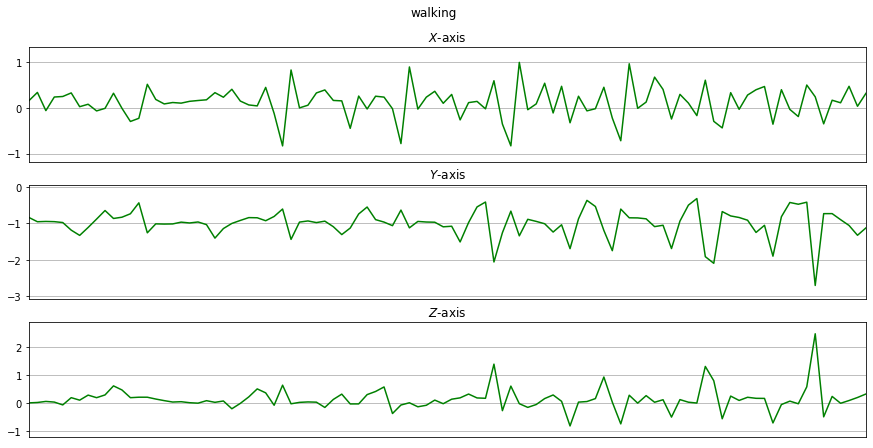

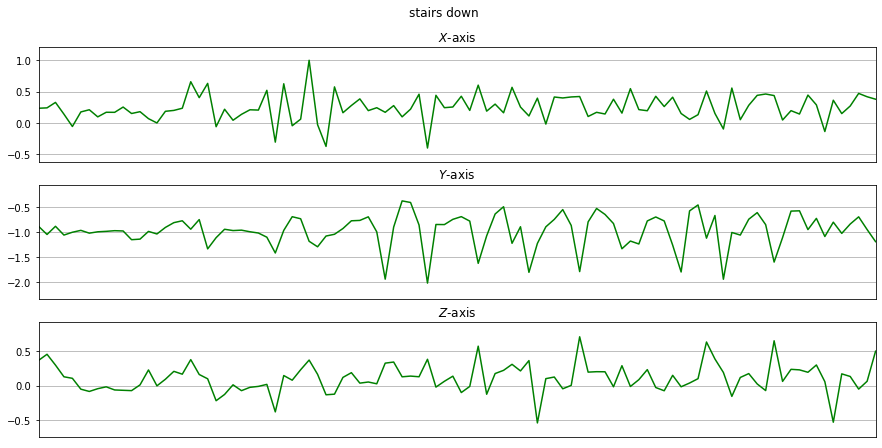

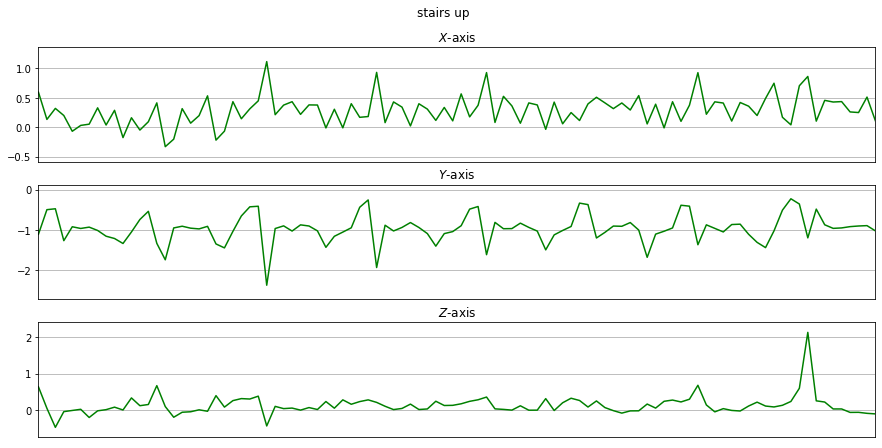

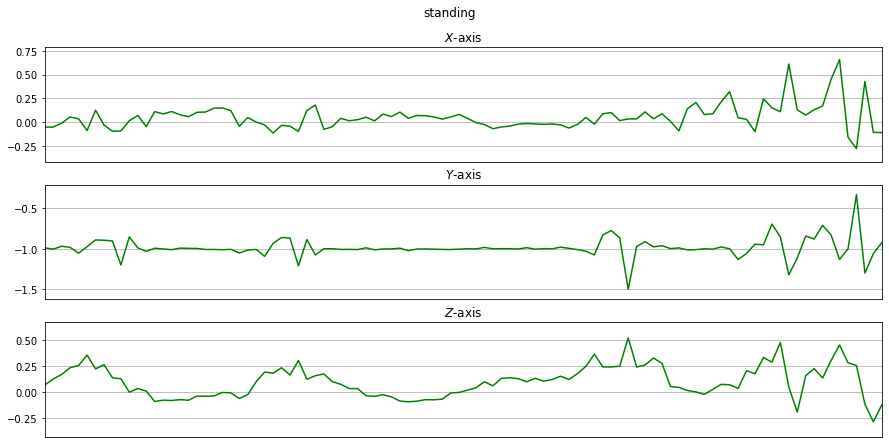

In [16]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y, "g")
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    ax.set_xlim([min(x),max(x)])
    ax.grid(True)
    
def plot_activity(activity, train_data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15,7), sharex=True)
    plot_axis(ax0, train_data['UTC time'], train_data['x'], '$X$-axis')
    plot_axis(ax1, train_data['UTC time'], train_data['y'], '$Y$-axis')
    plot_axis(ax2, train_data['UTC time'], train_data['z'], '$Z$-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

activities = train_data['activity'].value_counts().index
    
for activity in activities:
    plot_train_data = train_data[(train_data["activity"]==activity)][:Fs*10]
    plot_activity(activity, plot_train_data)

In [17]:
activities = train_data['activity'].value_counts().index
activities

Index(['walking', 'stairs down', 'stairs up', 'standing'], dtype='object')

In [18]:
train_data['activity'].value_counts()

walking        2130
stairs down     880
stairs up       461
standing        270
Name: activity, dtype: int64

### Applying Feature Scaling

Since the value of `x`, `y`, and `z` is relatively fluctuates in a different amplitudes, feature scaling is required.

In [19]:
X = train_data[['x', 'y', 'z']]
y = train_data[['label']]
sc = StandardScaler()
X = sc.fit_transform(X)
scaled_X = pd.DataFrame(data=X, columns=['x', 'y', 'z'])
scaled_X['label'] = y.values
scaled_X

,x,y,z,label
0,-0.631242,0.038923,-0.044070,1.0
1,-0.631820,0.003658,0.119694,1.0
2,-0.522781,0.083520,0.246365,1.0
3,-0.361767,0.050825,0.430654,1.0
4,-0.411969,-0.106227,0.490924,1.0
...,...,...,...,...
3736,-0.433676,0.652693,-0.154305,4.0
3737,0.735871,-0.207998,-0.284020,4.0
3738,0.438250,0.081457,-0.136041,4.0
3739,-0.071087,0.448577,-0.098731,4.0


### Spliting the `train_data` into train set and test set 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape

((2992, 3), (749, 3))

In [21]:
#this label encoder will be used for plotting the reault matrix
le = LabelEncoder()
train_data['label'] = le.fit_transform(train_data['activity'])
train_data

,UTC time,x,y,z,label,activity
Unnamed: 0,,,,,,
20589,2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985,2,standing
20590,2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450,2,standing
20591,2019-08-06T16:45:31.288,-0.010880,-0.967575,0.170898,2,standing
20592,2019-08-06T16:45:31.388,0.052841,-0.982330,0.235565,2,standing
20593,2019-08-06T16:45:31.488,0.032974,-1.053207,0.256714,2,standing
...,...,...,...,...,...,...
24325,2019-08-06T16:51:45.638,0.024384,-0.710709,0.030304,1,stairs up
24326,2019-08-06T16:51:45.738,0.487228,-1.099136,-0.015213,1,stairs up
24327,2019-08-06T16:51:45.838,0.369446,-0.968506,0.036713,1,stairs up


In [22]:
le.classes_

array(['stairs down', 'stairs up', 'standing', 'walking'], dtype=object)

### Training the Random Forest Classification model on the `train_data`

In [23]:
start_time = time.clock()

classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

end_time = time.clock()
duration = end_time - start_time
print("--- %s seconds ---" % (duration))

/Users/madesgputra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/Users/madesgputra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--- 0.6991329999999998 seconds ---


/Users/madesgputra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [24]:
accuracy = accuracy_score(y_pred, y_test)*100
print("---%s percent----" % (accuracy))

---61.148197596795725 percent----


### Making the Confusion Matrix 

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 37  14   3   0]
 [  9 356  47  15]
 [  3 121  47   5]
 [  5  63   6  18]]


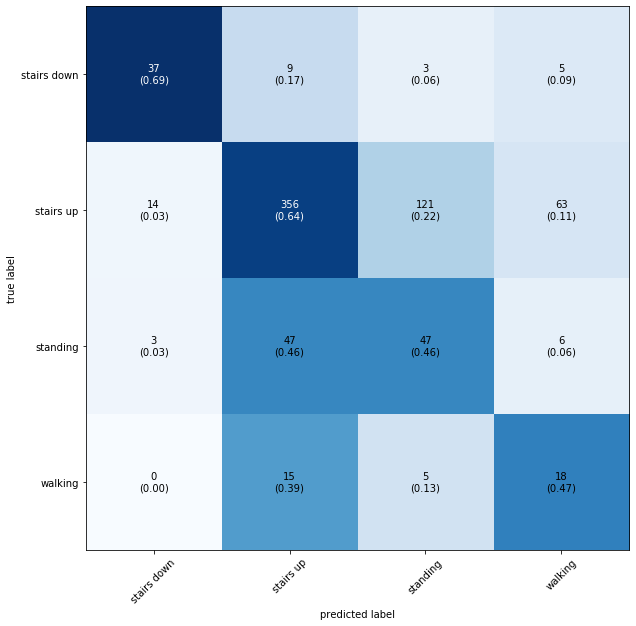

In [26]:
y_pred = classifier.predict(X_test)
mat = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(conf_mat=mat, class_names=le.classes_, show_normed=True, figsize=(10,10));

### Testing the Random Forest Classification model on the `test_data`

In [27]:
X_train = train_data[['x', 'y', 'z']]
y_train = train_data[['label']]
X_test = test_data[['x', 'y', 'z']]
y_test = test_data[['label']]

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

scaled_X_train = pd.DataFrame(data=X_train, columns=['x', 'y', 'z'])
scaled_X_train['label'] = y_train.values

scaled_X_test = pd.DataFrame(data=X_test, columns=['x', 'y', 'z'])
scaled_X_test['label'] = y_test.values

In [28]:
start_time = time.clock()

classifier1 = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)
classifier1.fit(X_train, y_train)

y_pred1 = classifier.predict(X_test)

end_time = time.clock()
duration = end_time - start_time
print("--- %s seconds ---" % (duration))

/Users/madesgputra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/Users/madesgputra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


--- 0.6999430000000002 seconds ---


/Users/madesgputra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


## Result

This section presents the modeling results and discusses the model performance. 

The model resulted in a relatively low preddiction with less than 70% is considered low for a medium size dataset sized 1000-10000 entries. Other method such as Decission Tree, Kernel SVM already been evalueated and showing even lower value.

In [29]:
y_pred1 = y_pred1.astype('int')
y_pred1 = np.array(y_pred1)
y_pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2,
       4, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2,
       2, 3, 4, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
test_data

,x,y,z,UTC time,label
Unnamed: 0,,,,,
24339,0.098282,-0.833771,0.118042,2019-08-06T16:51:47.041,NaN
24349,0.348465,-0.946701,-0.051041,2019-08-06T16:51:48.043,NaN
24359,0.377335,-0.849243,-0.026474,2019-08-06T16:51:49.046,NaN
24369,0.110077,-0.520325,0.312714,2019-08-06T16:51:50.048,NaN
24379,0.283478,-0.892548,-0.085876,2019-08-06T16:51:51.050,NaN
...,...,...,...,...,...
25539,-0.043915,-0.242416,0.068802,2019-08-06T16:53:47.366,NaN
25549,0.118271,-1.212097,0.357468,2019-08-06T16:53:48.369,NaN
25559,0.667404,-0.978851,0.171906,2019-08-06T16:53:49.371,NaN


In [31]:
test_data['label'] = y_pred1

In [32]:
result = test_data
result

,x,y,z,UTC time,label
Unnamed: 0,,,,,
24339,0.098282,-0.833771,0.118042,2019-08-06T16:51:47.041,2
24349,0.348465,-0.946701,-0.051041,2019-08-06T16:51:48.043,2
24359,0.377335,-0.849243,-0.026474,2019-08-06T16:51:49.046,2
24369,0.110077,-0.520325,0.312714,2019-08-06T16:51:50.048,2
24379,0.283478,-0.892548,-0.085876,2019-08-06T16:51:51.050,2
...,...,...,...,...,...
25539,-0.043915,-0.242416,0.068802,2019-08-06T16:53:47.366,2
25549,0.118271,-1.212097,0.357468,2019-08-06T16:53:48.369,2
25559,0.667404,-0.978851,0.171906,2019-08-06T16:53:49.371,2


In [34]:
result.to_csv('test_result.csv')

## Conclusion

The writer's hyphotesis is that the classifier model is best suited for binary data. for non binary data perhaps method such as clustering could be considered a better performing method.